### Problem Statement

To analyze the factors affecting the Life Expectancy of a person and then predict the life expectancy based on given parameters. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
df = pd.read_csv('Life Expectancy Data.csv')

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.shape

(2938, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [9]:
df =df.dropna(subset=['Population','Hepatitis B','GDP'])

In [10]:
for cols in df.columns:
    if df[cols].isnull().sum()>0:
        df[cols] = df[cols].fillna(df[cols].median()) 

### Histogram plot

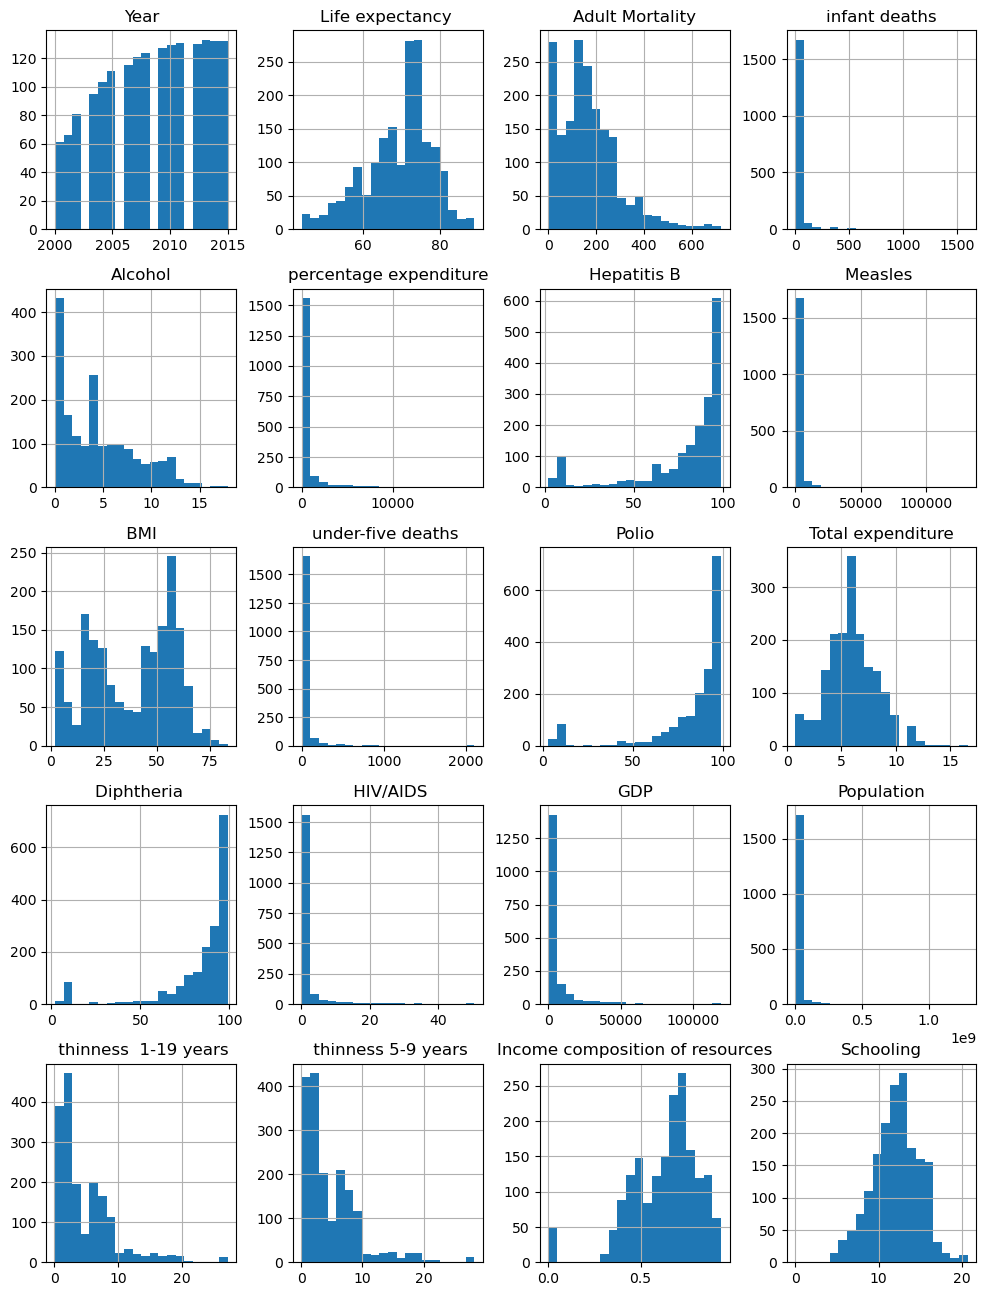

In [11]:
df.hist(bins =20,figsize=(12,16))
plt.show()

### Boxplot

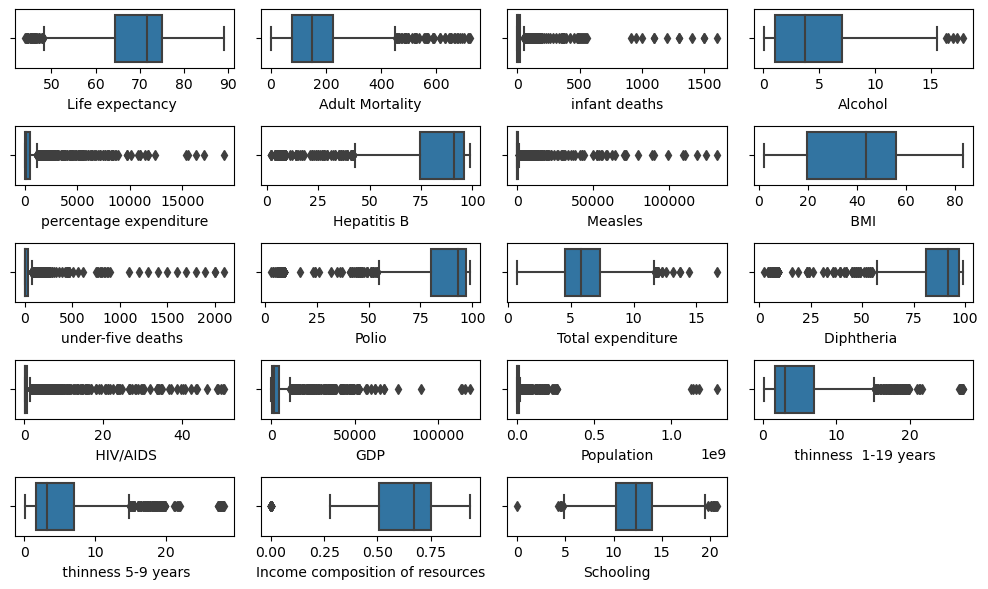

In [12]:
count =1
fig = plt.figure(figsize=(10,6))
cols = df.select_dtypes(exclude=['object']).columns.tolist()
cols.remove('Year')

for col in cols:
    plt.subplot(5, 4, count)
    sns.boxplot(x = df[col])
    count += 1
plt.tight_layout()
plt.show()

In [13]:
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1

    lower =Q1-1.5*IQR
    upper = Q3+1.5*IQR
    df.loc[df[col]>=upper,col]=upper
    df.loc[df[col]<=lower,col]=lower

In [14]:
df.replace({'Developing':0,'Developed':1},inplace =True)

In [15]:
k = df['Country'].value_counts().to_dict()
df['Country_label'] = df['Country'].map(k)

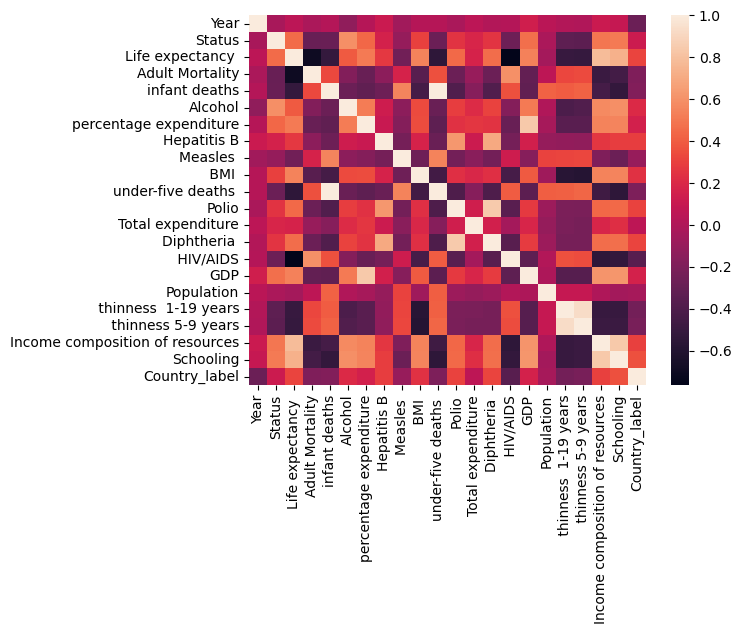

In [16]:
sns.heatmap(df.corr(),annot =False)
plt.show()

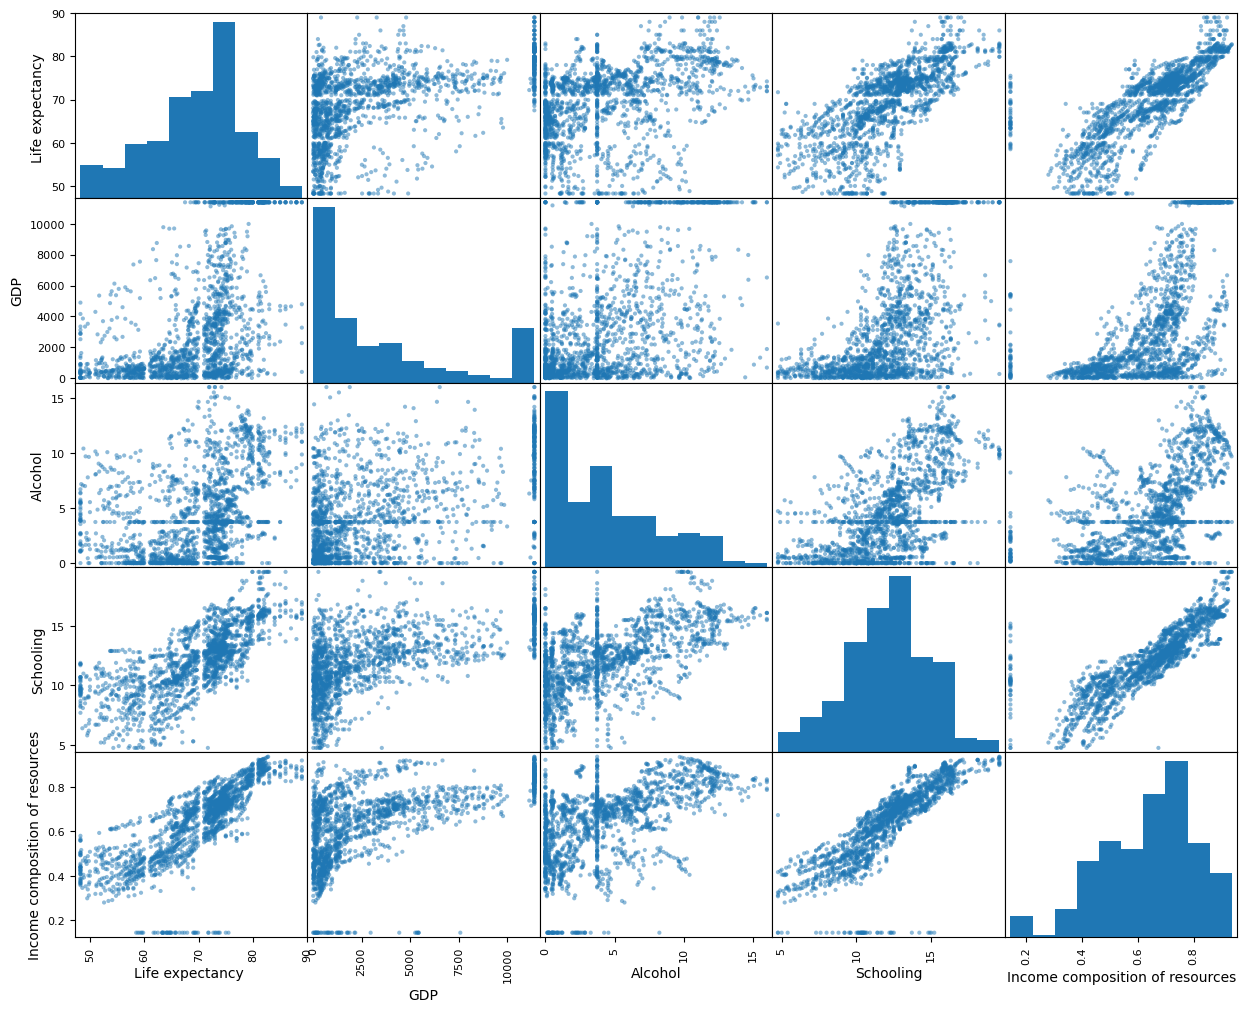

In [24]:
from pandas.plotting import scatter_matrix
features =["Life expectancy ","GDP","Alcohol","Schooling","Income composition of resources"]
scatter_matrix(df[features],figsize =(15,12))
plt.show()

In [25]:
columns =['Country','infant deaths',' thinness 5-9 years']
df.drop(columns,axis =1,inplace=True)

In [26]:
df.head()

,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling,Country_label
0,2015,0,65.0,263.0,0.01,71.279624,65.0,927.5,19.1,76,54.5,8.16,65.0,0.1,584.259210,19847564.25,15.1,0.479,10.1,16
1,2014,0,59.9,271.0,0.01,73.523582,62.0,492.0,18.6,76,58.0,8.18,62.0,0.1,612.696514,327582.00,15.1,0.476,10.0,16
2,2013,0,59.9,268.0,0.01,73.219243,64.0,430.0,18.1,76,62.0,8.13,64.0,0.1,631.744976,19847564.25,15.1,0.470,9.9,16
3,2012,0,59.5,272.0,0.01,78.184215,67.0,927.5,17.6,76,67.0,8.52,67.0,0.1,669.959000,3696958.00,15.1,0.463,9.8,16
4,2011,0,59.2,275.0,0.01,7.097109,68.0,927.5,17.2,76,68.0,7.87,68.0,0.1,63.537231,2978599.00,15.1,0.454,9.5,16


In [27]:
X = df.drop(columns='Life expectancy ',axis =1)
Y = df['Life expectancy ']

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=df['Status'])

In [29]:
minmax =MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [31]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators =[int(x) for x in np.linspace(start=4,stop =20,num=10)]
max_features =['auto','sqrt']
max_depth =[int(x) for x in np.linspace(start=10,stop =110,num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]

random_grid ={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth'   : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap'        : bootstrap 
}

In [32]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions =random_grid, n_iter =100, cv =5, verbose =2, random_state =42,n_jobs =-1)
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [4, 5, 7, 9, 11, 12, 14,
                                                         16, 18, 20]},
                   random_state=42, verbose=2)

In [33]:
rf_random.best_params_

{'n_estimators': 16,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [34]:
best_random =rf_random.best_estimator_

In [35]:
model = [ SVR(),LinearRegression(),KNeighborsRegressor(),best_random]

def evaluate(model,feature,label):
    for i in range(4):
        model[i].fit(feature,label)
        label_prediction = model[i].predict(feature)
        print(f'{model[i]}:')
        mse = mean_squared_error(label_prediction,label)
        rmse =np.sqrt(mse)
        print('RMSE:',rmse)
        errors = abs(label_prediction - label)
        residual =label_prediction - label
        mape = 100 * np.mean(errors / label)
        accuracy = 100 - mape
        print('accuracy:',accuracy)
        print("R-squared Score Obtained for predicting Life Expectancy is {0}".format(r2_score(label, label_prediction)))
        #plt.figure(figsize=(20,5))
        #sns.histplot(residual, kde=True, color="orange")
        #plt.title('Residual Plot')
        #plt.xlabel('Residuals: (Predictions - Actual)')
        #plt.ylabel('Density')
        print()

In [36]:
##For train data
evaluate(model,X_train,Y_train)

SVR():
RMSE: 3.2511761366974454
accuracy: 96.54435850024475
R-squared Score Obtained for predicting Life Expectancy is 0.8571468022555997

LinearRegression():
RMSE: 3.436823346543021
accuracy: 96.15538196724471
R-squared Score Obtained for predicting Life Expectancy is 0.8403667377285032

KNeighborsRegressor():
RMSE: 2.5100502315301325
accuracy: 97.29577523372582
R-squared Score Obtained for predicting Life Expectancy is 0.914852128767914

RandomForestRegressor(bootstrap=False, max_depth=70, max_features='sqrt',
                      min_samples_split=5, n_estimators=16, random_state=42):
RMSE: 0.3432424090030426
accuracy: 99.67980626388183
R-squared Score Obtained for predicting Life Expectancy is 0.9984077514871392



In [37]:
##For test data
evaluate(model,X_test,Y_test)

SVR():
RMSE: 3.850370595907255
accuracy: 95.76069096492743
R-squared Score Obtained for predicting Life Expectancy is 0.8035682611275288

LinearRegression():
RMSE: 3.40216846095632
accuracy: 96.2671734712648
R-squared Score Obtained for predicting Life Expectancy is 0.846637836906805

KNeighborsRegressor():
RMSE: 3.0989147619690773
accuracy: 96.54839592886854
R-squared Score Obtained for predicting Life Expectancy is 0.8727593559926818

RandomForestRegressor(bootstrap=False, max_depth=70, max_features='sqrt',
                      min_samples_split=5, n_estimators=16, random_state=42):
RMSE: 0.43795990716145833
accuracy: 99.54504730772037
R-squared Score Obtained for predicting Life Expectancy is 0.9974585866494965



### Conclusions